# Tarea 2
## Métodos gradiente estocásticos

In [30]:
library(numDeriv)                           
library(heavy)

Tarea: Implementar el algoritmo gradiente estocástico con $h(x, y)$ definida en el ejemplo
anterior, y considere los siguientes escenarios:

In [31]:
t=proc.time()

# Mostramos un mapa del dominio de h(x,y)
h = function(x, y)  (x*sin(20*y) + y*sin(20*x))^2*cosh(sin(10*x)*x)+ (x*cos(10*y) - y*sin(10*x))^2*cosh(cos(20*y)*y)
a = 1
x = seq(from=-a, to=a, length.out=1000)
y = seq(from=-a, to=a, length.out=1000)
z = outer(x, y, h)

# Tomamos nuestra estimación inicial
theta_0 = c(0.4, 0.5)
alfa = 0.1
# Número de iteraciones
k = 150

f = function(x)  (x[1]*sin(20*x[2]) + x[2]*sin(20*x[1]))^2*cosh(sin(10*x[1])*x[1])+ (x[1]*cos(10*x[2]) - x[2]*sin(10*x[1]))^2*cosh(cos(20*x[2])*x[2])


thetas = matrix(NA, ncol=2, nrow=k+1)      
colnames(thetas) = c('x', 'y')
thetas[1, ] = theta_0                      

for (i in 2:(k+1))
  thetas[i, ] = thetas[i-1, ] - alfa * grad(func=f, x=thetas[i-1, ])

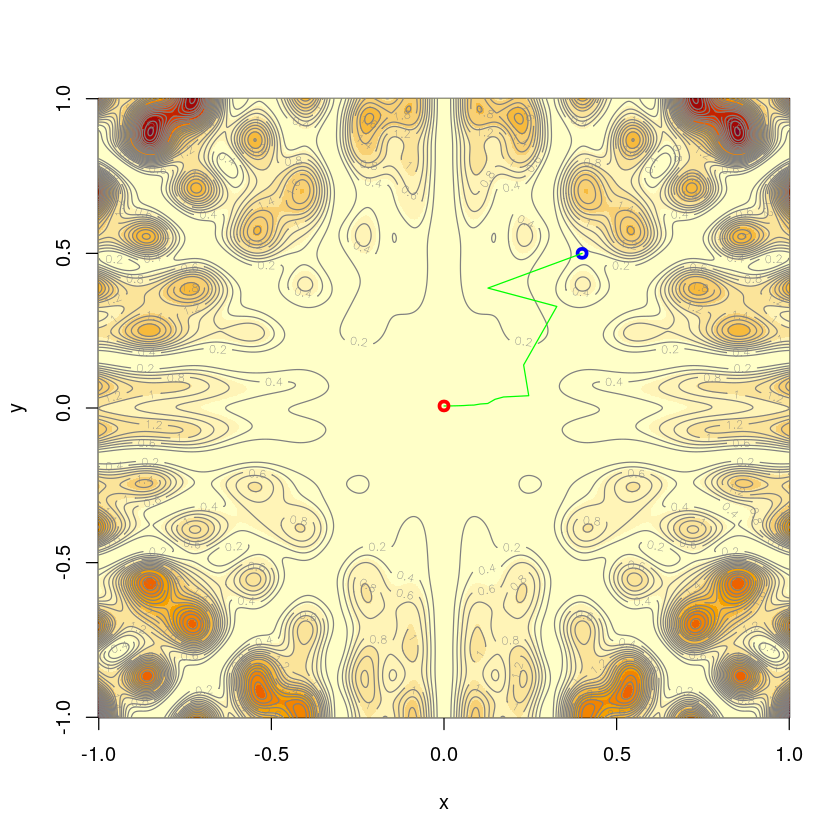

In [32]:
image(x=x, y=y, z=z)
contour(x=x, y=y, z=z, add=TRUE, nlevels=40, col=gray(0.5))
points(theta_0[1],theta_0[2],col='blue',lwd = 3)
points(thetas[,1],thetas[,2],col='green',type='l')
points(thetas[k,1],thetas[k,2],col='red',lwd = 3)

In [33]:
thetas[k,]
f(thetas[k,])

x            y 
2.095992e-14 6.635269e-03

x 
4.12014e-28

## Agregamos el modelo estocastico

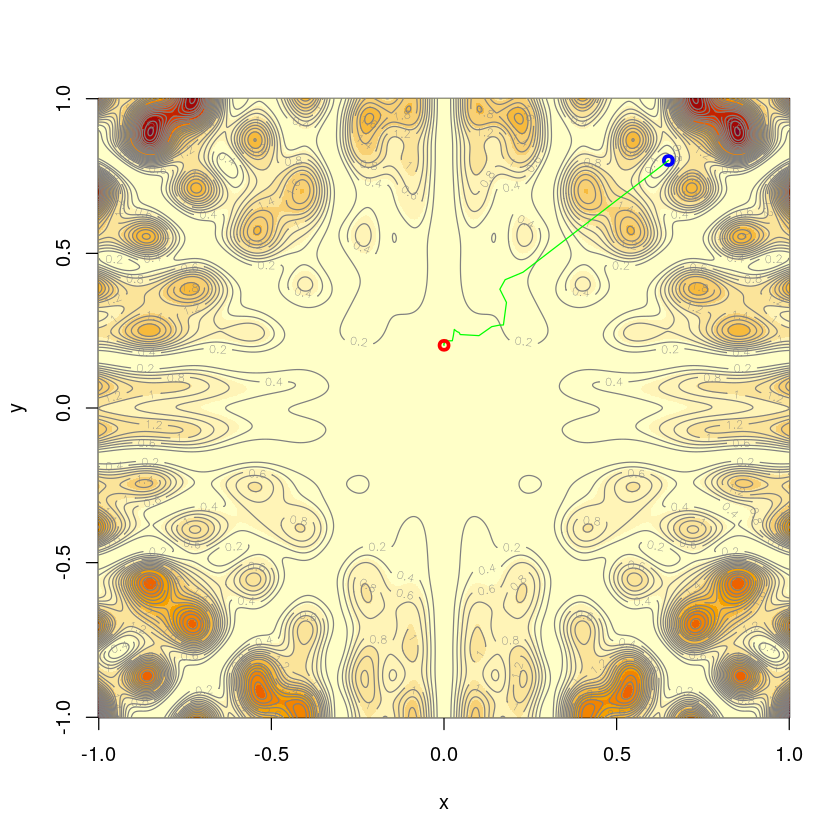

In [34]:
h.x = function(x)  (x[1]*sin(20*x[2]) + x[2]*sin(20*x[1]))^2*cosh(sin(10*x[1])*x[1])+ (x[1]*cos(10*x[2]) - x[2]*sin(10*x[1]))^2*cosh(cos(20*x[2])*x[2])
# Tomamos nuestra estimación inicial
theta_0 = c(0.65, 0.8)
# Número de iteraciones
iter = 58

# Funciones gamma y lambda
gamma = function(k){
    return(1/(10*log(1+k)))
}
lambda = function(k){
    return(1/k)
}

# Creamos el vector z
z=rsphere(iter,2)

# La función diferencia
dif = function(h.x,theta,lambda,z,k){
    a=(h.x(theta[k,] + lambda(k)*z[k,]) - h.x(theta[k,]-lambda(k)*z[k,]))/(2*lambda(k))*z[k,]
    return(a)
}

# creamos la matriz de thetas
thetas = matrix(NA, ncol=2, nrow=iter+1)      
colnames(thetas) = c('x','y')
thetas[1, ] = theta_0    

for (k in 1:iter){
    thetas[k+1,]=thetas[k,]-gamma(k)*dif(h.x,thetas,lambda,z,k)
}

h = function(x, y)  (x*sin(20*y) + y*sin(20*x))^2*cosh(sin(10*x)*x)+ (x*cos(10*y) - y*sin(10*x))^2*cosh(cos(20*y)*y)
a = 1
x = seq(from=-a, to=a, length.out=1000)
y = seq(from=-a, to=a, length.out=1000)
z = outer(x, y, h)
image(x=x, y=y, z=z)
contour(x=x, y=y, z=z, add=TRUE, nlevels=40, col=gray(0.5))
points(theta_0[1],theta_0[2],col='blue',lwd = 3)
points(thetas[,1],thetas[,2],col='green',type='l')
points(thetas[iter,1],thetas[iter,2],col='red',lwd = 3)

In [35]:
thetas[iter,]
h.x(thetas[iter,])

x            y 
0.0001645238 0.2026740761

x 
4.541808e-07

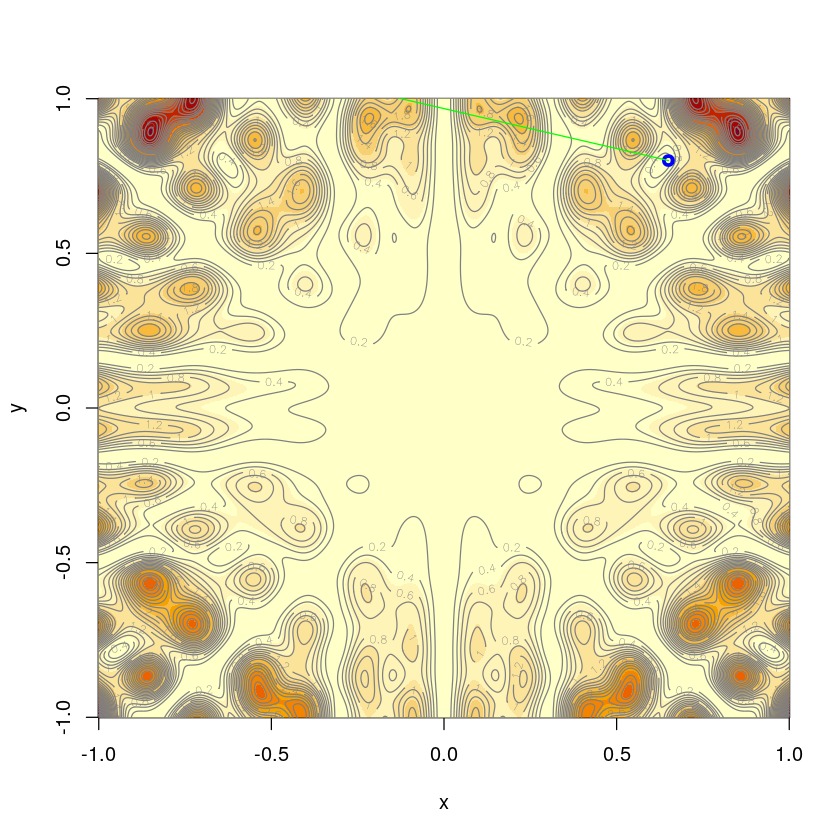

In [36]:
# Problema 1
# Tomamos nuestra estimación inicial
theta_0 = c(0.65, 0.8)
# Número de iteraciones
iter = 100

# Funciones gamma y lambda
gamma = function(k){
    return(1/(log(1+k)))
}
lambda = function(k){
    return(1/(log(1+k))^(1/10))
}

# Creamos el vector z
set.seed(0)
z=rsphere(iter,2)

# La función diferencia
dif = function(h.x,theta,lambda,z,k){
    a=(h.x(theta[k,] + lambda(k)*z[k,]) - h.x(theta[k,]-lambda(k)*z[k,]))/(2*lambda(k))*z[k,]
    return(a)
}

# creamos la matriz de thetas
thetas = matrix(NA, ncol=2, nrow=iter+1)      
colnames(thetas) = c('x','y')
thetas[1, ] = theta_0    

for (k in 1:iter){
    thetas[k+1,]=thetas[k,]-gamma(k)*dif(h.x,thetas,lambda,z,k)
}

h = function(x, y)  (x*sin(20*y) + y*sin(20*x))^2*cosh(sin(10*x)*x)+ (x*cos(10*y) - y*sin(10*x))^2*cosh(cos(20*y)*y)
a = 1
x = seq(from=-a, to=a, length.out=1000)
y = seq(from=-a, to=a, length.out=1000)
z = outer(x, y, h)
image(x=x, y=y, z=z)
contour(x=x, y=y, z=z, add=TRUE, nlevels=40, col=gray(0.5))
points(theta_0[1],theta_0[2],col='blue',lwd = 3)
points(thetas[,1],thetas[,2],col='green',type='l')
points(thetas[iter,1],thetas[iter,2],col='red',lwd = 3)

In [38]:
thetas[iter,]
h.x(thetas[iter,])

x   y 
NaN NaN

x 
NaN

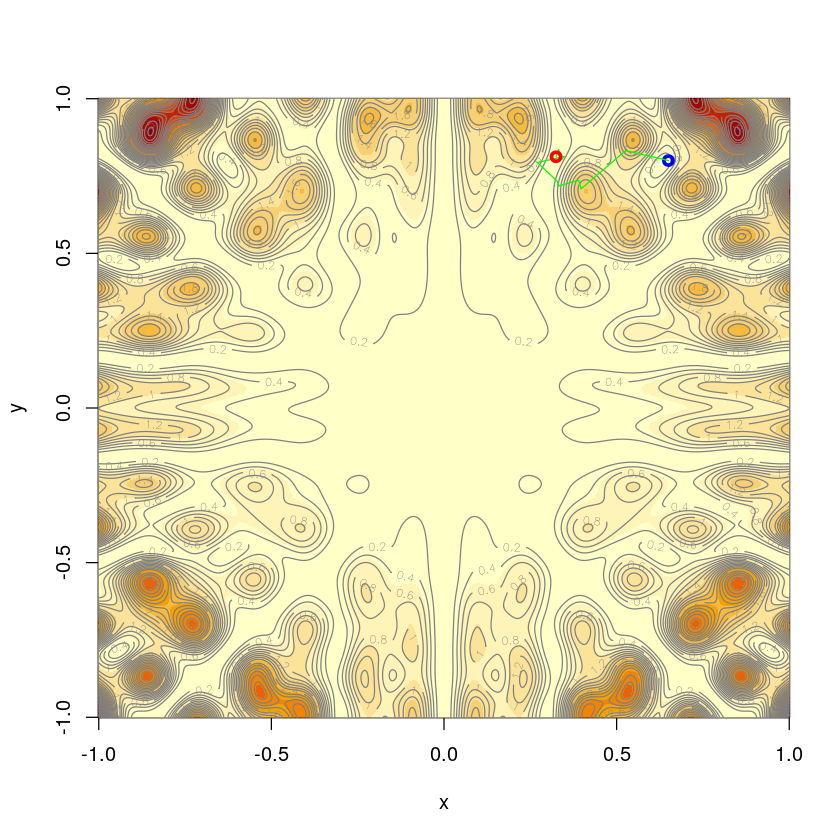

In [42]:
# Problema 2
# Tomamos nuestra estimación inicial
theta_0 = c(0.65, 0.8)
# Número de iteraciones
iter = 10000

# Funciones gamma y lambda
gamma = function(k){
    return(1/(100*log(1+k)))
}
lambda = function(k){
    return(1/(100*log(1+k)))
}

# Creamos el vector z
set.seed(0)
z=rsphere(iter,2)

# La función diferencia
dif = function(h.x,theta,lambda,z,k){
    a=(h.x(theta[k,] + lambda(k)*z[k,]) - h.x(theta[k,]-lambda(k)*z[k,]))/(2*lambda(k))*z[k,]
    return(a)
}

# creamos la matriz de thetas
thetas = matrix(NA, ncol=2, nrow=iter+1)      
colnames(thetas) = c('x','y')
thetas[1, ] = theta_0    

for (k in 1:iter){
    thetas[k+1,]=thetas[k,]-gamma(k)*dif(h.x,thetas,lambda,z,k)
}

h = function(x, y)  (x*sin(20*y) + y*sin(20*x))^2*cosh(sin(10*x)*x)+ (x*cos(10*y) - y*sin(10*x))^2*cosh(cos(20*y)*y)
a = 1
x = seq(from=-a, to=a, length.out=1000)
y = seq(from=-a, to=a, length.out=1000)
z = outer(x, y, h)
image(x=x, y=y, z=z)
contour(x=x, y=y, z=z, add=TRUE, nlevels=40, col=gray(0.5))
points(theta_0[1],theta_0[2],col='blue',lwd = 3)
points(thetas[,1],thetas[,2],col='green',type='l')
points(thetas[iter,1],thetas[iter,2],col='red',lwd = 3)

In [44]:
thetas[iter,]
h.x(thetas[iter,])

x         y 
0.3245312 0.8122435

x 
6.611036e-06

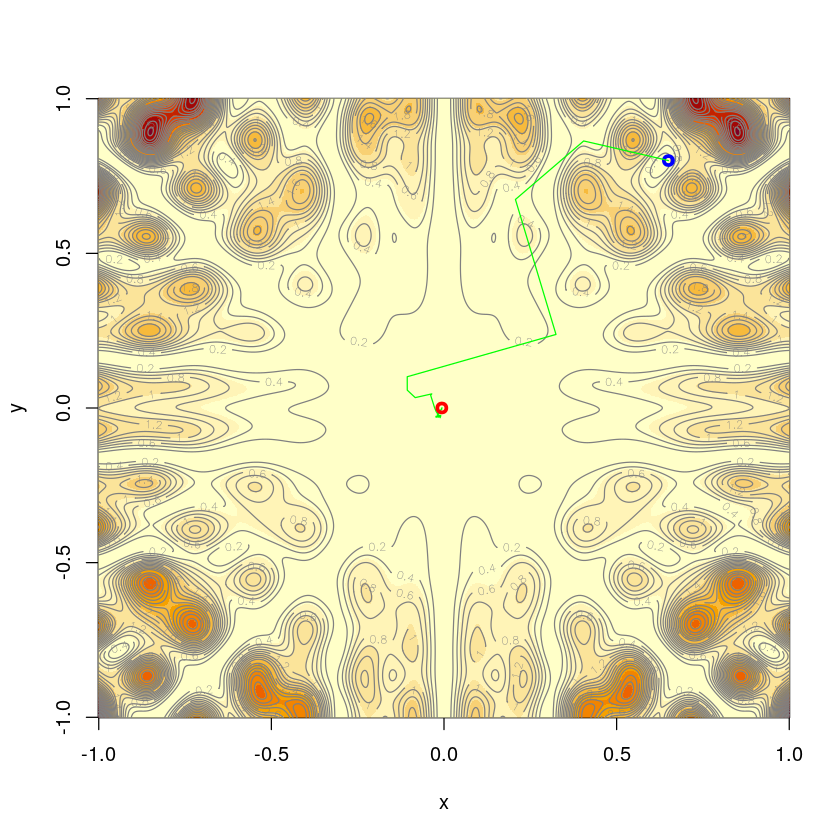

In [45]:
# Problema 3
# Tomamos nuestra estimación inicial
theta_0 = c(0.65, 0.8)
# Número de iteraciones
iter = 100

# Funciones gamma y lambda
gamma = function(k){
    return(1/(1+k))
}
lambda = function(k){
    return(1/(1+k)^(1/2))
}

# Creamos el vector z
set.seed(0)
z=rsphere(iter,2)

# La función diferencia
dif = function(h.x,theta,lambda,z,k){
    a=(h.x(theta[k,] + lambda(k)*z[k,]) - h.x(theta[k,]-lambda(k)*z[k,]))/(2*lambda(k))*z[k,]
    return(a)
}

# creamos la matriz de thetas
thetas = matrix(NA, ncol=2, nrow=iter+1)      
colnames(thetas) = c('x','y')
thetas[1, ] = theta_0    

for (k in 1:iter){
    thetas[k+1,]=thetas[k,]-gamma(k)*dif(h.x,thetas,lambda,z,k)
}

h = function(x, y)  (x*sin(20*y) + y*sin(20*x))^2*cosh(sin(10*x)*x)+ (x*cos(10*y) - y*sin(10*x))^2*cosh(cos(20*y)*y)
a = 1
x = seq(from=-a, to=a, length.out=1000)
y = seq(from=-a, to=a, length.out=1000)
z = outer(x, y, h)
image(x=x, y=y, z=z)
contour(x=x, y=y, z=z, add=TRUE, nlevels=40, col=gray(0.5))
points(theta_0[1],theta_0[2],col='blue',lwd = 3)
points(thetas[,1],thetas[,2],col='green',type='l')
points(thetas[iter,1],thetas[iter,2],col='red',lwd = 3)


In [46]:
thetas[iter,]
h.x(thetas[iter,])

x             y 
-0.0062697675  0.0001213481

x 
3.921557e-05

In [47]:
# Problema 4
# Tomamos nuestra estimación inicial
theta_0 = c(0.65, 0.8)
# Número de iteraciones
iter = 100

# Funciones gamma y lambda
gamma = function(k){
    return(1/(1+k))
}
lambda = function(k){
    return(1/(1+k)^(1/10))
}

# Creamos el vector z
set.seed(0)
z=rsphere(iter,2)

# La función diferencia
dif = function(h.x,theta,lambda,z,k){
    a=(h.x(theta[k,] + lambda(k)*z[k,]) - h.x(theta[k,]-lambda(k)*z[k,]))/(2*lambda(k))*z[k,]
    return(a)
}

# creamos la matriz de thetas
thetas = matrix(NA, ncol=2, nrow=iter+1)      
colnames(thetas) = c('x','y')
thetas[1, ] = theta_0    

for (k in 1:iter){
    thetas[k+1,]=thetas[k,]-gamma(k)*dif(h.x,thetas,lambda,z,k)
}

h = function(x, y)  (x*sin(20*y) + y*sin(20*x))^2*cosh(sin(10*x)*x)+ (x*cos(10*y) - y*sin(10*x))^2*cosh(cos(20*y)*y)
a = 1
x = seq(from=-a, to=a, length.out=1000)
y = seq(from=-a, to=a, length.out=1000)
z = outer(x, y, h)
pdf(file="8.pdf") 
image(x=x, y=y, z=z)
contour(x=x, y=y, z=z, add=TRUE, nlevels=40, col=gray(0.5))
points(theta_0[1],theta_0[2],col='blue',lwd = 3)
points(thetas[,1],thetas[,2],col='green',type='l')
points(thetas[iter,1],thetas[iter,2],col='red',lwd = 3)
dev.off()

png 
  2

In [49]:
thetas[iter,]
h.x(thetas[iter,])

x           y 
0.002253731 0.034518977

x 
1.074795e-05

# Simulated Annealing

In [62]:
h = function(x) (cos(50*x) + sin(20*x))^2

In [63]:
# Dominio de la h
li = 0 #limite inferior
ls = 1 #limite superior

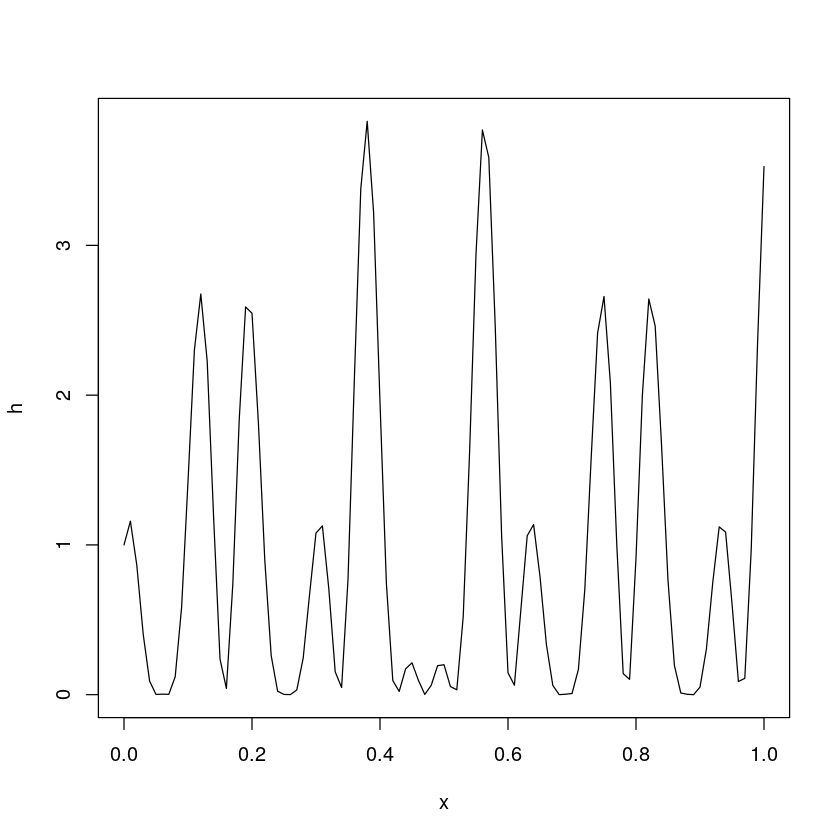

In [64]:
plot(h,xlim=c(0,1))

Podríamos pensar que el máximo es 3.7 app

In [65]:
T = function(k){
    return(1/(log(k)+1))
}

In [66]:
dh = function(h,k,deltas,thetas){
    return(h(thetas[k]+deltas[k])-h(thetas[k])) 
}

In [67]:
theta_0 = 0.5

In [68]:
iter=5000

In [69]:
#creamos un vector de semillas
semilla = seq(1,iter+2,1)

In [70]:
thetas = matrix(NA, ncol=1, nrow=iter+1)      
colnames(thetas) = c('x')
thetas[1, ] = theta_0    

In [71]:
# construimos los vectores delta:
deltas = matrix(NA, ncol=1, nrow=iter+1)      
for (k in 1:(iter+2)){
    xi =sqrt(T(k))
    set.seed(semilla[k])
    deltas[k-1,] = runif(1,-xi,xi)
}


In [72]:
for (k in 1:iter){
    p = min(
        exp(
        dh(h,k,deltas,thetas)/T(k)
        ), 1
    )
set.seed(semilla[k])
p0 = runif(1,0,1)
if (p>=p0){
        a = thetas[k,] + deltas[k,]
        if (a >li & a <ls){
            thetas[k+1,] = a
        } else {
            thetas[k+1,] = thetas[k,]
        }
    } else {
        thetas[k+1,] = thetas[k,]
    }
}

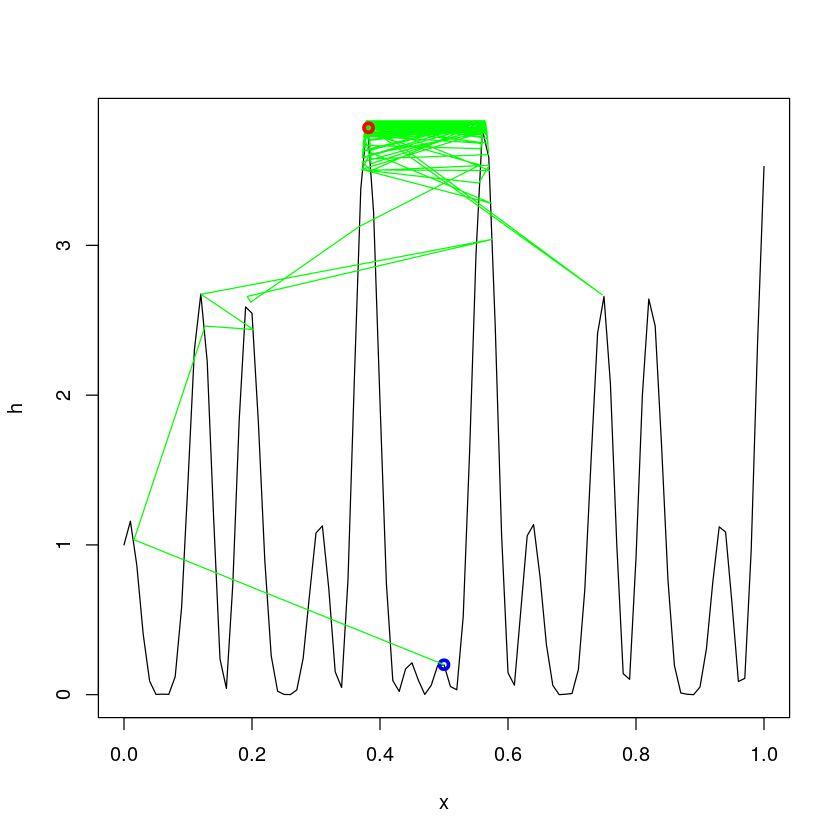

In [73]:
plot(h,xlim=c(0,1))
points(theta_0,h(theta_0),col='blue',lwd = 3)
points(thetas,h(thetas),col='green',type='l')
points(thetas[iter+1],h(thetas[iter+1]),col='red',lwd = 3)

In [74]:
thetas[iter,]
h(thetas[iter,])

x 
0.3820589

x 
3.785014